# Mentoring 1 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. Submit your result to the submission form

## Dataset Description
---

**Note**

- This dataset originally comes from [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)
- We perform several edit for this mentoring purposes. So, please use the dataset from [here](https://drive.google.com/file/d/1-Fr3OMbI1yKU_jNy-6cgXFJDVzjph3sn/view?usp=sharing).


**Description**
- We're looking to predict the fare of Uber's transactions.
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`order_id`| `int` | a unique identifier for each trip|
|`pickup_time` | `str` | a class of pickup time. `04-10`, `10-16`, `16-22`, `22-04`. E.g. `04-10` means the pickup time is between 04.00 to 10.00|
| `pickup_longitude` | `float` | the longitude where the meter was engaged|
| `pickup_latitude` | `float` | the latitude where the meter was engaged|
| `dropoff_longitude` | `float` | the longitude where the meter was disengaged|
| `dropoff_latitude` | `float` | the latitude where the meter was disengaged|
| `passenger_count` | `float` | the number of passengers in the vehicle (driver entered value)|
| `fare_amount` | `int` | the cost of each trip in USD, (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
```

### 1. Import data to Python (10 pts)
---

In [1]:
####################################################
# Import Numpy and Pandas library
# Write your code here
####################################################
import pandas as pd
import numpy as np

In [2]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `order_id`, keep the last ones
# - Set `order_id` as index
# - Print the data shape
# - Return the dataset
# Write your code here
####################################################
def read_data(fname):
    data_frame = pd.read_csv(fname)
    data_frame = data_frame.drop_duplicates(subset=['order_id'], keep='last')
    data_frame = data_frame.set_index('order_id')
    return data_frame

In [3]:
# Read the Uber data (JUST RUN THE CODE)
data = read_data(fname='uber_edit.csv')
data.head(10)

,fare_amount,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,,
24238194,7.5,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,7.7,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,12.9,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,5.3,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16.0,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


### 2. Data Preprocessing (60 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Separate Numerical and Categorical Features
2.4 Numerical Imputation
2.5 Categorical Imputation
2.6 Preprocess Categorical Features
2.7 Join the Data
2.8 Feature Engineering the Data
2.9 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (6 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [4]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################
def split_input_output(data, target_col):
    output_data = data[target_col]
    input_data = data.drop(target_col, axis=1)
    return input_data, output_data

In [5]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data, target_col='fare_amount')

In [6]:
X.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
24238194,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


In [7]:
y.head()  # (JUST RUN THE CODE)

order_id
24238194     7.5
27835199     7.7
44984355    12.9
25894730     5.3
17610152    16.0
Name: fare_amount, dtype: float64

#### 2.2. Train-Valid-Test Split (6 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [8]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################

from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size, seed):
    return train_test_split(X, y, test_size=test_size, random_state=seed)

In [9]:
# Split the data
# First, split the train & not train

# WRITE YOUR CODE HERE, Use seed=123
X_train, X_not_train, y_train, y_not_train = split_train_test(
    X, y, test_size=0.2, seed=123
)

# Then, split the valid & test
# WRITE YOUR CODE HERE, Use seed=123
X_valid, X_test, y_valid, y_test = split_train_test(
    X_not_train, y_not_train, test_size=0.5, seed=123
)

In [10]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999989733797366
0.09999794675947314
0.1000030798607903


In [11]:
X_train.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0


#### 2.3. Separate Numerical and Categorical Features (6 pts)
---

- We now prepare to perform data preprocessing
- But, we first separate the data into numerical data & categorical data.

In [12]:
####################################################
# Create a function to split numerical & categorical input
# - you have three parameters
#   - data, an input data (pd. Dataframe)
#   - num_cols, a list of numerical columns (list)
#   - cat_cols, a list of categorical columns (list)
# - and write a validation that you perform right operation
# - and return two dataframe, numerical & categorical data
# Write your code here
####################################################
def split_numerical_categorical_input(data, num_cols, cat_cols):
    numerical_data = data[num_cols]
    categorical_data = data[cat_cols]
    return numerical_data, categorical_data

In [13]:
# Split the data
# WRITE YOUR CODE HERE
numerical_columns = [
    "pickup_longitude",	"pickup_latitude", "dropoff_longitude",
    "dropoff_latitude",	"passenger_count"
]
categorical_columns = [
    "pickup_time"
]
X_train_num, X_train_cat = split_numerical_categorical_input(X_train, numerical_columns, categorical_columns)

In [14]:
X_train_num.head()  # (JUST RUN THE CODE)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0


In [15]:
X_train_cat.head()  # (JUST RUN THE CODE)

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [16]:
100 * (X_train.isna().sum(0) / len(X_train))

pickup_time          0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
passenger_count      0.606348
dtype: float64

- We will impute all these variables if there is any missing value

- First, check the numerical features distribution

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

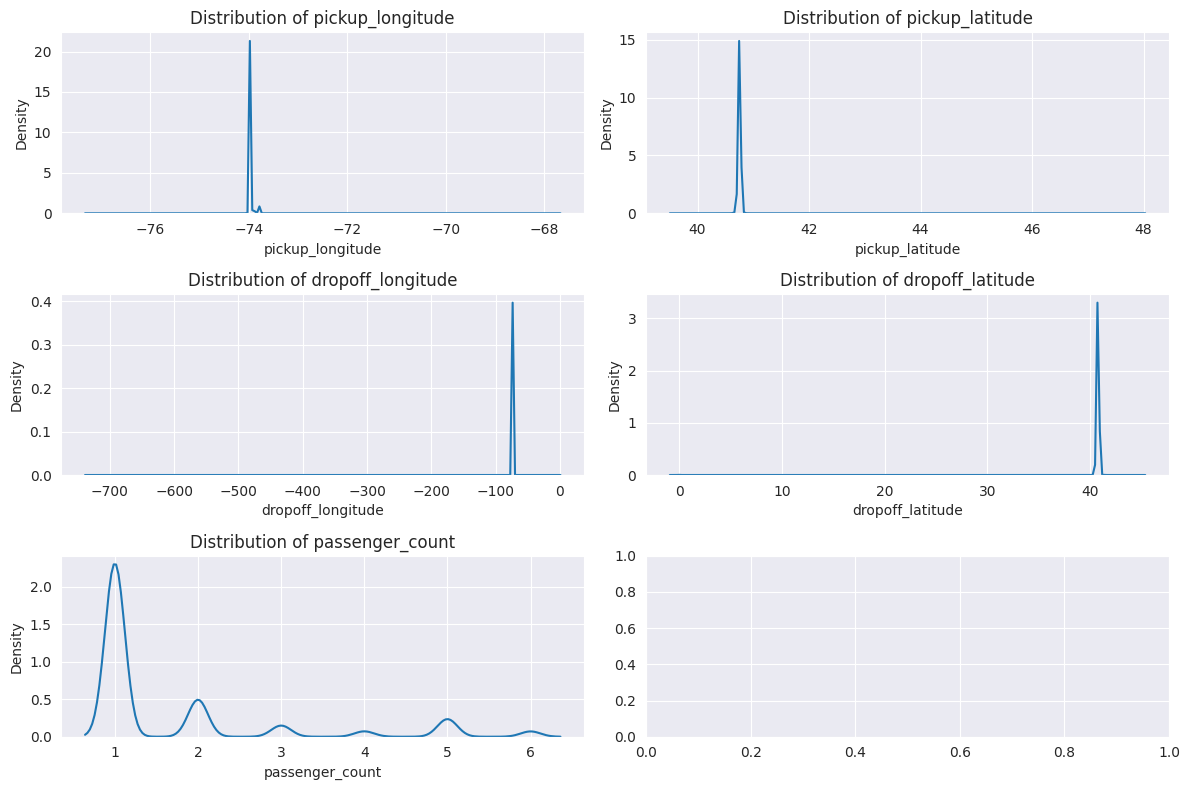

In [18]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

\- All the distribution are skewed, we can impute a missing value by its features median.

- Next, explore the `pickup_time`

In [19]:
X_train['pickup_time'].value_counts(normalize=True)

pickup_time
16-22    0.328160
10-16    0.286376
22-04    0.221648
04-10    0.157599
-        0.006217
Name: proportion, dtype: float64

- There's a missing value with symbol `'-'` in `pickup_time`,
- We can impute the missing value with `UNKNOWN`

- Explore the relation between `pickup_time` and `fare`

In [20]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
order_id,,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0,16.5
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0,3.7
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0,18.9
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0,4.1
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0,5.0


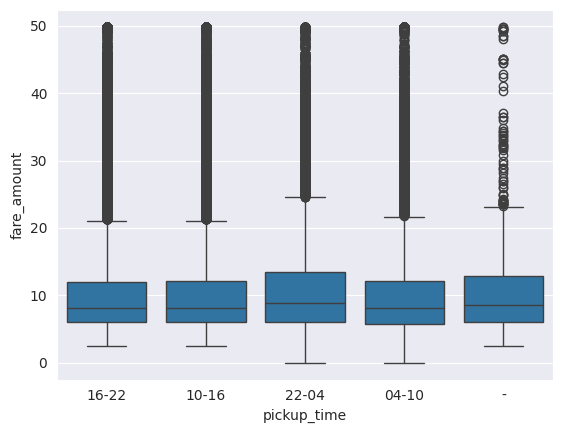

In [21]:
# Create a boxplot
sns.boxplot(data=train_data[train_data['fare_amount'] < 50],
            x='pickup_time',
            y='fare_amount')
plt.show()

- There is no significant fare different between `pickup_time`.
- We can perform a one hot encoding for this data.

**Conclusion for preprocessing**
- Impute the missing `passenger_counts` with its median
- Impute the missing `pickup_time` with `'UNKNOWN'`
- Feature engineering the `dropoff` and `pickup` coordinate to be a distance between pickup and dropoff. We can use an Euclidean distance for simplicity.

#### 2.4. Numerical Imputation (6 pts)
---

- Now, let's perform a numerical imputation
- First check the missing value of the numerical data

In [22]:
# Check missing value (JUST RUN THE CODE)
X_train_num.isna().sum(0)

pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count      945
dtype: int64

- Create a function to fit a numerical features imputer

In [23]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
from sklearn.impute import SimpleImputer


def num_imputer_fit(data):
    numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    numeric_imputer.fit(data)
    return numeric_imputer


def num_imputer_transform(data, numeric_imputer):
    imputed_data = numeric_imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)
    return imputed_data

- Perform imputation

In [24]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_num) # WRITE YOUR CODE HERE

# Transform the data
X_train_num_imputed = num_imputer_transform(X_train_num, num_imputer) # WRITE YOUR CODE HERE

In [25]:
# Validate (JUST RUN THE CODE)
X_train_num_imputed.isna().sum(0)

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Great!

#### 2.5. Categorical Imputation (6 pts)
---

- Next, let's perform the categorical imputation

In [26]:
# Check missing value (JUST RUN THE CODE)
X_train_cat.value_counts()

pickup_time
16-22          51144
10-16          44632
22-04          34544
04-10          24562
-                969
Name: count, dtype: int64

- Create a function to fit a categorical features imputer

In [27]:
####################################################
# Create function to fit & transform categorical imputers
# The fit function is called by cat_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is '-'
# - the imputation strategy is filling it with 'UNKNOWN'
# - it return the imputer
#
# The transform function is called by cat_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
from sklearn.impute import SimpleImputer


def cat_imputer_fit(data):
    categorical_imputer = SimpleImputer(missing_values='-', strategy='constant', fill_value='UNKNOWN')
    categorical_imputer.fit(data)
    return categorical_imputer


def cat_imputer_transform(data, categorical_imputer):
    imputed_data = categorical_imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)
    return imputed_data

- Perform imputation

In [28]:
# Perform categorical imputation
cat_imputer = cat_imputer_fit(X_train_cat) # WRITE YOUR CODE HERE

# Transform
X_train_cat_imputed = cat_imputer_transform(X_train_cat, cat_imputer) # WRITE YOUR CODE HERE

In [29]:
# Validate (JUST RUN THE CODE)
X_train_cat_imputed.value_counts(normalize=True)

pickup_time
16-22          0.328160
10-16          0.286376
22-04          0.221648
04-10          0.157599
UNKNOWN        0.006217
Name: proportion, dtype: float64

Great!

#### 2.6. Preprocess Categorical Features (6 pts)
---

- We will create a one-hot-encoder (read the `EDA before processing`) for the categorical features
- Create a function to perform a one hot encoder

In [30]:
####################################################
# Write two functions to perform OHE for the categorical data
# The first function is called cat_encoder_fit
# - It needs 1 input, the data (pd.DataFrame)
# - You create an encoder (from OHE Sklearn)
# - input all categories of the categorical data
# - if there is other category outside the categories listed right now, ignore it
# - return the encoder
#
# The second function is called cat_encoder_transfrom
# - It needs two input, the data (pd.DataFrame), the encoder (sklearn object)
# - It transform the input data based on the encoder
# - It returns the encoded data (pd.DataFrame)
#
# Write your code here
####################################################
from sklearn.preprocessing import OneHotEncoder


def cat_encoder_fit(data):
    categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    categorical_encoder.fit(data)
    return categorical_encoder


def cat_encoder_transform(data, categorical_encoder):
    encoded_data = categorical_encoder.transform(data)
    ohe_data = pd.DataFrame(encoded_data, columns=categorical_encoder.get_feature_names_out(), index=data.index)
    return ohe_data

- Perform imputation

In [31]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(X_train_cat_imputed) # WRITE YOUR CODE HERE

# Transform
X_train_cat_encoded = cat_encoder_transform(X_train_cat_imputed, cat_encoder) # WRITE YOUR CODE HERE


In [32]:
# Validate  (JUST RUN THE CODE)
print('Original shape:', X_train_cat_imputed.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (155851, 1)
Encoded shape : (155851, 5)


In [33]:
# Validate  (JUST RUN THE CODE)
X_train_cat_encoded.head()

,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN
order_id,,,,,
51655713,0.0,0.0,1.0,0.0,0.0
37525839,0.0,0.0,1.0,0.0,0.0
55058970,0.0,0.0,1.0,0.0,0.0
15663447,0.0,1.0,0.0,0.0,0.0
13325650,0.0,0.0,1.0,0.0,0.0


In [34]:
# Validate  (JUST RUN THE CODE)
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


Great!

#### 2.7. Join the data (6 pts)
---

- After all the data is filled (numerically), we can join the data
- Create a function to join the data

In [35]:
####################################################
# Create a function to join / concat the data
# The function is called by concat_data
# - It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
# - Don't forget to validate your process
# - It returns the concated data
#
# Write your code here
####################################################
def concat_data(num_data, cat_data):
    return pd.concat([num_data, cat_data], axis=1)

- Perform concatenated

In [36]:
# Concat the data
X_train_concat = concat_data(X_train_num_imputed, X_train_cat_encoded)# WRITE YOUR CODE HERE

In [37]:
# Validate (JUST RUN THE CODE)
X_train_concat.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN
order_id,,,,,,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0,0.0,0.0,1.0,0.0,0.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0,0.0,0.0,1.0,0.0,0.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0,0.0,0.0,1.0,0.0,0.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0,0.0,1.0,0.0,0.0,0.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0,0.0,0.0,1.0,0.0,0.0


Great!

#### 2.8. Feature engineering the data (8 pts)
---

- Now, `pickup` and `dropoff` coordinate is not an explicit features.
- We can create a better feature called by `distance` to summarize the `pickup` and `dropoff` coordinate.

In [38]:
####################################################
# Create a function that obtain the distance
# The function is called with map_distance
# - It needs an input, data (pd.DataFrame)
# - In the input, you calculate the trip distance using Euclidean Distance
#   ref: https://www.cuemath.com/euclidean-distance-formula/
# - Then, you can save the distance information as a new column, 'distance'
# - And you can drop the pickup and dropoff latitude and longitude
# - You return the mapped data
#
# Write your code here
####################################################
def map_distance(data):
    def calculate_distance(x1, y1, x2, y2):
        return np.sqrt(((x1-x2)**2) + ((y1-y2)**2))
    
    data['distance'] = data.apply(lambda row: calculate_distance(
        row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude
    ), axis=1)
    
    data = data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)

    return data

- Perform distance calculation (4 pts)

In [39]:
# Calculate the distance
X_train_concat_fe = map_distance(X_train_concat)# WRITE YOUR CODE HERE

In [40]:
# Validate (JUST RUN THE CODE)
X_train_concat_fe.head()

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
order_id,,,,,,,
51655713,2.0,0.0,0.0,1.0,0.0,0.0,0.073766
37525839,5.0,0.0,0.0,1.0,0.0,0.0,0.008585
55058970,1.0,0.0,0.0,1.0,0.0,0.0,0.075901
15663447,6.0,0.0,1.0,0.0,0.0,0.0,0.007733
13325650,1.0,0.0,0.0,1.0,0.0,0.0,0.011140


- And finally, we standardize the data so that it can perform well during model optimization (4 pts)

In [41]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
from sklearn.preprocessing import StandardScaler


def fit_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler


def transform_scaler(data, scaler):
    scaled_data_raw = scaler.transform(data)
    scaled_data_pd = pd.DataFrame(scaled_data_raw, columns=data.columns, index=data.index)
    return scaled_data_pd

In [42]:
# Fit the scaler
scaler = fit_scaler(X_train_concat_fe)# WRITE YOUR CODE HERE

# Transform the scaler
X_train_clean = transform_scaler(X_train_concat_fe, scaler)# WRITE YOUR CODE HERE

In [43]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
count,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0383
25%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0340
50%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0311
75%,0.2412,-0.4325,1.5786,1.4308,-0.5336,-0.0791,-0.0256
max,3.3130,2.3120,1.5786,1.4308,1.8739,12.6427,218.5245


Great!

#### 2.9. Create the preprocess function (10 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [44]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_cols, the numerical columns, list
#   - cat_cols, the categorical columns, list
#   - num_imputer, the numerical imputer, sklearn object
#   - cat_imputer, the categorical imputer, sklearn object
#   - cat_encoder, the categorical encoder, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.3 - 2.8
# - You return the clean data
#
# Write your code here
####################################################
def preprocess_data(data, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler):
    numerical_data = data[num_cols]
    numerical_data_imputed = num_imputer_transform(numerical_data, num_imputer)
    numerical_data_imputed = pd.DataFrame(
        numerical_data_imputed, 
        columns=numerical_data.columns, index=numerical_data.index
    )

    categorical_data = data[cat_cols]
    x_train_cat_imputed = cat_imputer_transform(categorical_data, cat_imputer)
    x_train_cat_encoded = cat_encoder_transform(x_train_cat_imputed, cat_encoder)
    cat_data_encoded = pd.DataFrame(
        x_train_cat_encoded,
    )

    merged_data = pd.concat([numerical_data_imputed, cat_data_encoded], axis=1)
    
    merged_data = map_distance(merged_data)
    transformed_data = transform_scaler(merged_data, scaler)
    
    return transformed_data

In [45]:
# Preprocess the data training again
numerical_columns = [
    "pickup_longitude",	"pickup_latitude", "dropoff_longitude",
    "dropoff_latitude",	"passenger_count"
]
categorical_columns = [
    "pickup_time"
]

# WRITE YOUR CODE HERE
X_train_clean = preprocess_data(
    X_train, 
    numerical_columns, categorical_columns, 
    num_imputer, cat_imputer, 
    cat_encoder, scaler 
)

In [46]:
# Validate (JUST RUN THE CODE)
print('Original data shape:', X_train.shape)
print('Cleaned data shape :', X_train_clean.shape)
X_train_clean.head()

Original data shape: (155851, 6)
Cleaned data shape : (155851, 7)


,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
order_id,,,,,,,
51655713,0.241233,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013978
37525839,2.545080,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.035436
55058970,-0.526715,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013275
15663447,3.313029,-0.432531,1.578579,-0.698891,-0.533634,-0.079097,-0.035716
13325650,-0.526715,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.034594


In [47]:
# Transform other set of data
# WRITE YOUR CODE HERE
X_valid_clean = preprocess_data(
    X_valid,
    numerical_columns, categorical_columns,
    num_imputer, cat_imputer,
    cat_encoder, scaler
)

# WRITE YOUR CODE HERE
X_test_clean = preprocess_data(
    X_test,
    numerical_columns, categorical_columns,
    num_imputer, cat_imputer,
    cat_encoder, scaler
)

### 3. Training Machine Learning Models (40 pts)
---

```
3.1 Prepare train & evaluate model function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare train & evaluate model function (10 pts)
---

- Before modeling, let's prepare function to train & evaluate model

In [48]:
####################################################
# First, create a function to train model called train_model
# - It needs 3 input
#   - estimator, the model (sklearn model)
#   - X_train, the input (pd.DataFrame)
#   - y_train, the output (pd.DataFrame)
# - You only fit the estimator using the X_train & y_train
# - Then return nothing
#
# Next, create a function to evaluate model called evaluate_model
# - It needs 5 input
#   - estimator, the model (sklearn model)
#   - X_train, the train input (pd.DataFrame)
#   - y_train, the train output (pd.DataFrame)
#   - X_valid, the valid input (pd.DataFrame)
#   - y_valid, the valid output (pd.DataFrame)
# - You calculate the model performance using root mean squared error metrics
# - Then return two output, rmse_train and rmse_valid
#
# Write your code here
####################################################
from sklearn.metrics import mean_squared_error


def train_model(estimator, X_train, y_train):
    estimator.fit(X_train, y_train)
    

def evaluate_model(estimator, X_train, y_train, X_valid, y_valid):   
    y_train_prediction = estimator.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_prediction))
    
    y_valid_prediction = estimator.predict(X_valid)
    rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_prediction))
    return rmse_train, rmse_valid

#### 3.2. Train and Evaluate Several Models (10 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model
  2. k-NN with k=1
  3. k-NN with k=100
  4. k-NN with k=200
  5. k-NN with k=500
  6. k-NN with k=len(data)

In [50]:
####################################################
# Create your model here (no need to create function)
# Write your code here
####################################################
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

reg_1 = DummyRegressor(strategy="mean") # Write your code here, follow the description
reg_2 = KNeighborsRegressor(n_neighbors=1)# Write your code here, follow the description
reg_3 = KNeighborsRegressor(n_neighbors=100)# Write your code here, follow the description
reg_4 = KNeighborsRegressor(n_neighbors=200)# Write your code here, follow the description
reg_5 = KNeighborsRegressor(n_neighbors=500)# Write your code here, follow the description
# reg_6 = KNeighborsRegressor(n_neighbors=len(X_train_clean))# Write your code here, follow the description

In [51]:
# Train the model (JUST RUN THE CODE)
train_model(reg_1, X_train_clean, y_train)
train_model(reg_2, X_train_clean, y_train)
train_model(reg_3, X_train_clean, y_train)
train_model(reg_4, X_train_clean, y_train)
train_model(reg_5, X_train_clean, y_train)
# train_model(reg_6, X_train_clean, y_train)

In [52]:
# Return validation (JUST RUN THE CODE)
import time

for reg in [reg_1, reg_2, reg_3, reg_4, reg_5]:
    t0 = time.time()

    # Generate the rmse
    rmse_train, rmse_valid = evaluate_model(estimator=reg,
                                            X_train=X_train_clean,
                                            y_train=y_train,
                                            X_valid=X_valid_clean,
                                            y_valid=y_valid)

    # Logging
    elapsed = time.time() - t0
    print(f'model : {str(reg):40s} '
          f'| RMSE train: {rmse_train:.4f} '
          f'| RMSE valid: {rmse_valid:.4f} '
          f'| RMSE difference abs(train - valid) : {abs(rmse_train - rmse_valid):.4f} ' 
          f'| Time elapsed: {elapsed*1000:.2f} ms')

model : DummyRegressor()                         | RMSE train: 8.9221 | RMSE valid: 8.8614 | RMSE difference abs(train - valid) : 0.0606 | Time elapsed: 1.62 ms
model : KNeighborsRegressor(n_neighbors=1)       | RMSE train: 1.3980 | RMSE valid: 5.4116 | RMSE difference abs(train - valid) : 4.0136 | Time elapsed: 14482.83 ms
model : KNeighborsRegressor(n_neighbors=100)     | RMSE train: 3.9594 | RMSE valid: 3.9783 | RMSE difference abs(train - valid) : 0.0189 | Time elapsed: 19818.94 ms
model : KNeighborsRegressor(n_neighbors=200)     | RMSE train: 4.1505 | RMSE valid: 4.1420 | RMSE difference abs(train - valid) : 0.0085 | Time elapsed: 27053.05 ms
model : KNeighborsRegressor(n_neighbors=500)     | RMSE train: 4.6286 | RMSE valid: 4.6223 | RMSE difference abs(train - valid) : 0.0064 | Time elapsed: 48238.48 ms


#### 3.3. Choose the best model (20 pts)
---

From the previous results, which one is the best model? (10 pts)

```
Answer in this section (you can use bahasa)
```
reg_2 = KNeighborsRegressor(n_neighbors=100)

Why do you choose that model? (10 pts)

```
Explain your answer in here (you can use bahasa)
```

We take the model that have the least value of "RMSE valid" and the shortest amount of training duration. In this case, KNeighborsRegressor with K's value = 100 performs the best.
The reason why we only need to focus on "RMSE valid" because "RMSE train" was already used for training which mean the model already learned this data.

And, create a `reg_best` to store the best model

In [456]:
# Write your code here
reg_best = KNeighborsRegressor(n_neighbors=1)
train_model(reg_best, X_train_clean, y_train)

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train data
---

In [458]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

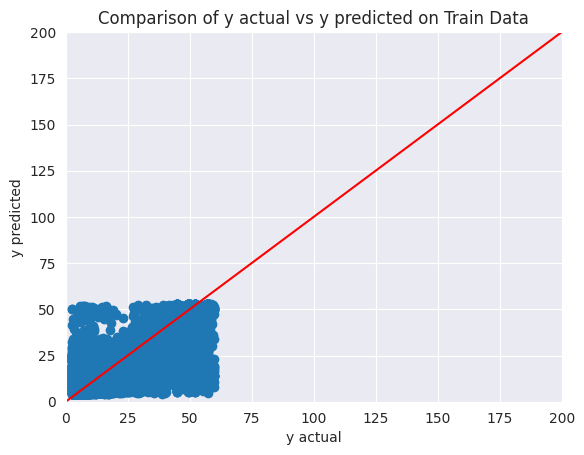

In [459]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train, y_train_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [460]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

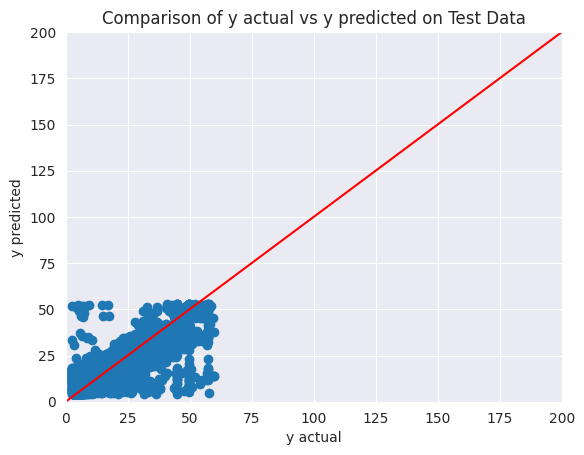

In [461]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test, y_test_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()